In [294]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [248]:
df = pd.read_excel('/Users/JohnnyBlaze/Website Data Sets/Online Retail.xlsx', parse_dates=[4])

In [249]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [251]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [252]:
df = df[df['Quantity'] > 0 ]

In [253]:
len(df)

531285

In [254]:
df['Sales'] = (df['Quantity'] * df['UnitPrice'])

In [255]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [256]:
clock = df[df['Description'].str.contains('CLOCK', na=False)]

In [257]:
len(clock)

7180

In [258]:
clock['Category'] = 'Clock'

In [259]:
clock.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity', 'UnitPrice'], axis=1, inplace=True)

In [260]:
clock.head()

,InvoiceDate,Country,Sales,Category
26,2010-12-01 08:45:00,France,90.0,Clock
27,2010-12-01 08:45:00,France,90.0,Clock
28,2010-12-01 08:45:00,France,45.0,Clock
149,2010-12-01 09:45:00,United Kingdom,15.0,Clock
204,2010-12-01 10:03:00,Australia,17.0,Clock


In [261]:
clock['Country'].value_counts()

United Kingdom        6415
France                 184
Germany                141
EIRE                   127
Belgium                 63
Australia               38
Switzerland             35
Denmark                 25
Spain                   24
Norway                  21
Iceland                 18
Channel Islands         13
Netherlands             13
Portugal                11
Finland                 11
Singapore                7
Cyprus                   7
Israel                   6
Canada                   5
Poland                   3
Greece                   2
Brazil                   2
Malta                    2
Italy                    2
RSA                      2
Hong Kong                1
European Community       1
Unspecified              1
Name: Country, dtype: int64

In [262]:
clock = clock.loc[clock['Country'] == 'United Kingdom']

In [263]:
clock.drop('Country', axis=1, inplace=True)

In [264]:
len(clock)

6415

In [265]:
clock.head()

,InvoiceDate,Sales,Category
149,2010-12-01 09:45:00,15.0,Clock
271,2010-12-01 10:47:00,15.0,Clock
272,2010-12-01 10:47:00,30.0,Clock
273,2010-12-01 10:47:00,30.0,Clock
274,2010-12-01 10:47:00,30.0,Clock


In [266]:
type(clock)

pandas.core.frame.DataFrame

In [267]:
# clock3 = pd.DataFrame(clock.groupby("InvoiceDate")['Sales'].sum().reset_index())
# clock3.head()

In [268]:
# clock3.plot(figsize=(12, 4))
# plt.title('Clock Sales', fontweight='bold', size=20)
# plt.show()

In [269]:
# clock.resample('H', on='InvoiceDate').Sales.sum()

In [270]:
clock2 = clock.resample('D', on='InvoiceDate').Sales.sum().reset_index()

In [271]:
clock2 = pd.DataFrame(clock2)

In [272]:
clock2.head()

,InvoiceDate,Sales
0,2010-12-01,568.40
1,2010-12-02,798.25
2,2010-12-03,587.62
3,2010-12-04,0.00
4,2010-12-05,596.00


In [273]:
clock2 = clock2[clock2['Sales'] > 1]

In [274]:
type(clock2)

pandas.core.frame.DataFrame

In [275]:
len(clock2)

303

In [276]:
clock2 = clock2.rename(columns={'Sales': 'Clock_Sales'})

In [277]:
clock2.head()

,InvoiceDate,Clock_Sales
0,2010-12-01,568.40
1,2010-12-02,798.25
2,2010-12-03,587.62
4,2010-12-05,596.00
5,2010-12-06,475.97


In [278]:
clock2['InvoiceDate'].min()

Timestamp('2010-12-01 00:00:00')

In [279]:
clock2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 373
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  303 non-null    datetime64[ns]
 1   Clock_Sales  303 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.1 KB


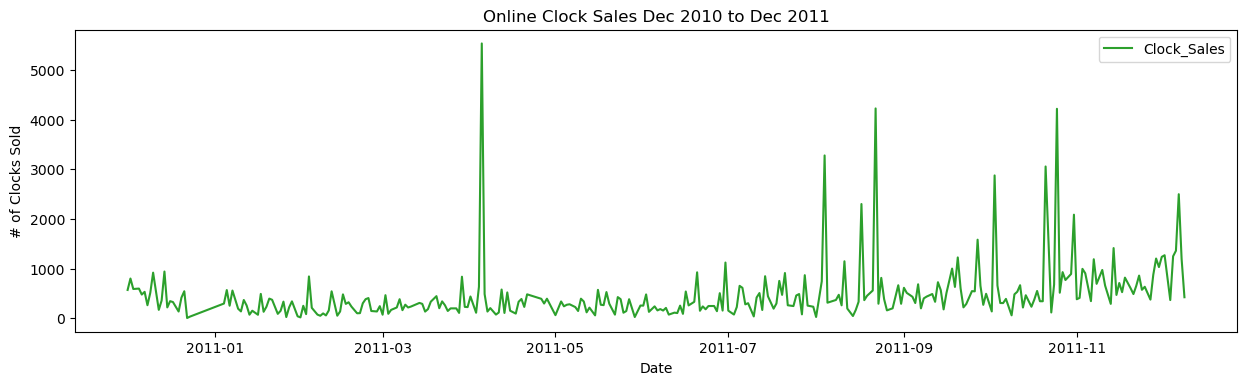

In [313]:
def plot_df(clock2, x, y, title="", xlabel='Date', ylabel='# of Clocks Sold', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend(['Clock_Sales'])
    plt.show()
    
plot_df(df, x=clock2['InvoiceDate'], y=clock2['Clock_Sales'], title='Online Clock Sales Dec 2010 to Dec 2011')

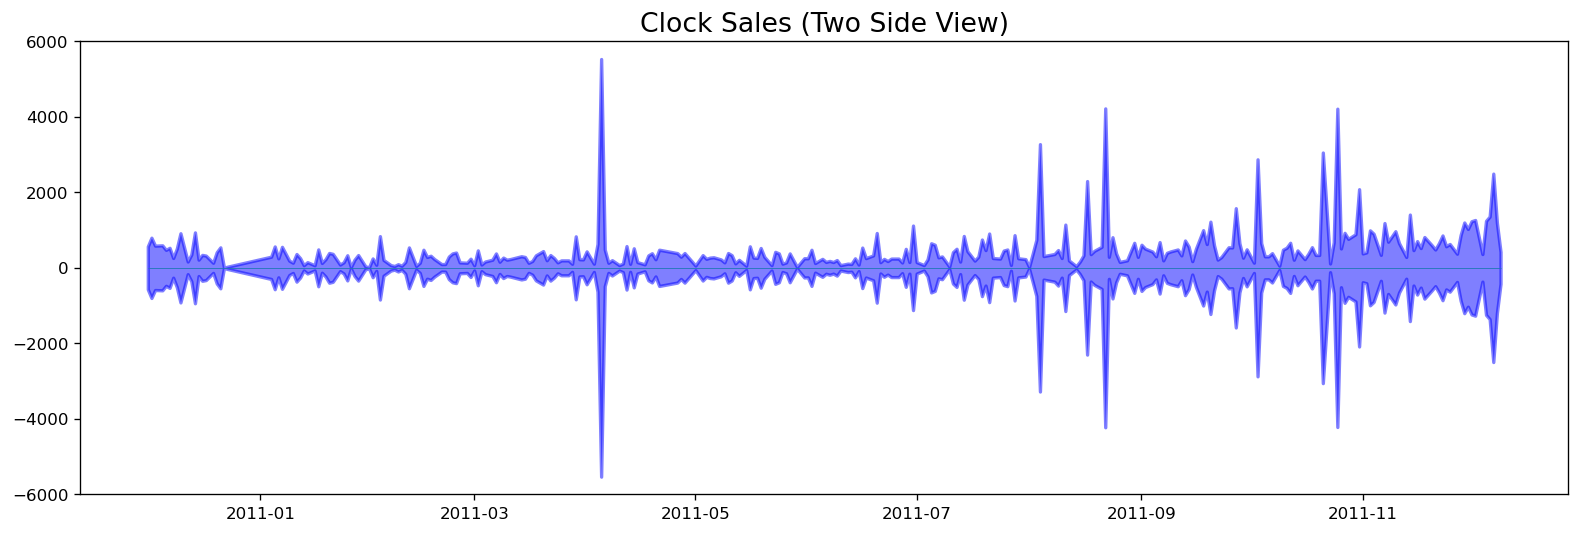

In [310]:
x = clock2['InvoiceDate'].values
y1 = clock2['Clock_Sales'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='blue')
plt.ylim(-6000, 6000)
plt.title('Clock Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(clock2['InvoiceDate']), xmax=np.max(clock2['InvoiceDate']), linewidth=.5)
plt.show()

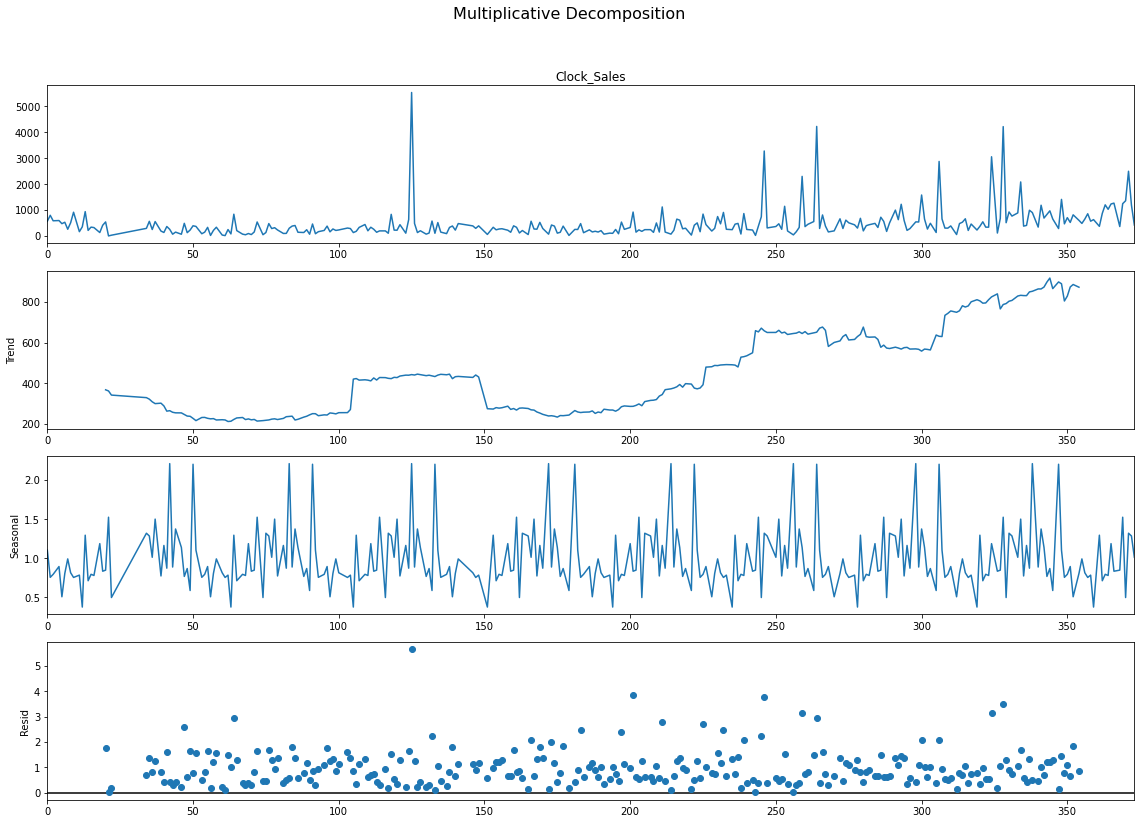

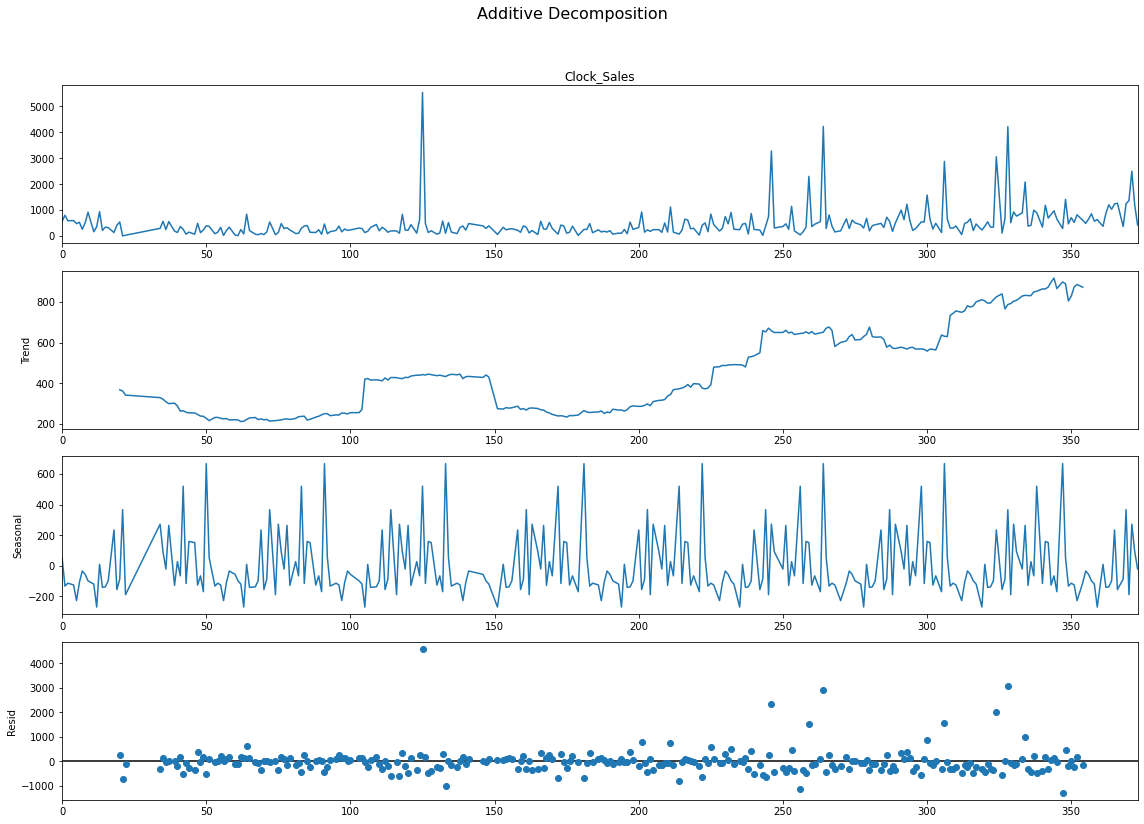

In [320]:
# Decomposition
# Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(clock2['Clock_Sales'], model='multiplicative', period=35)

# Additive Decomposition
additive_decomposition = seasonal_decompose(clock2['Clock_Sales'], model='additive', period=35)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## If we look at the residuals of the additive decomposition closely, it has some pattern left over.

## The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

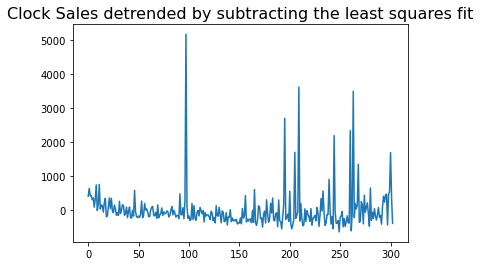

In [302]:
# Detrend

from scipy import signal
detrended = signal.detrend(clock2['Clock_Sales'].values)
plt.plot(detrended)
plt.title('Clock Sales detrended by subtracting the least squares fit', fontsize=16)
plt.show()

## The graph loooks the same as when it was first plotted suggesting no trend

In [323]:
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
X = clock2['Clock_Sales'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.091994
p-value: 0.000998
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572


## Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

## This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

## Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

## Stationarity of the time-series data: The stationarity of the data can be found using adfuller class of statsmodels.tsa.stattools module. The value of p-value is used to determine whether there is stationarity. If the value is less than 0.05, the stationarity exists.

In [334]:
# Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

# Run the test

df_stationarityTest = adfuller(clock2['Clock_Sales'], autolag='AIC')

# Check the value of p-value

print("P-value: ", df_stationarityTest[1])

P-value:  0.000998459148273761


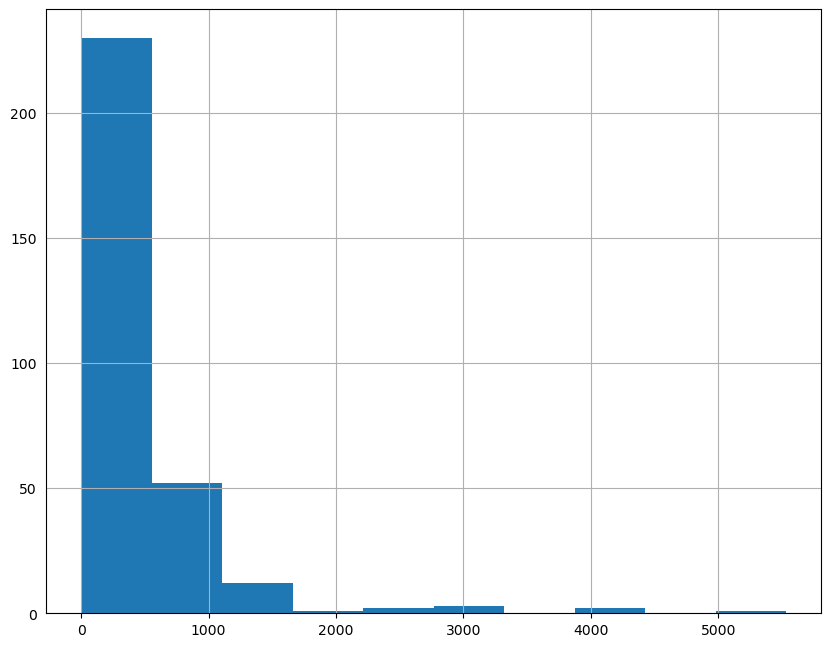

In [333]:
clock2['Clock_Sales'].hist()
plt.show()

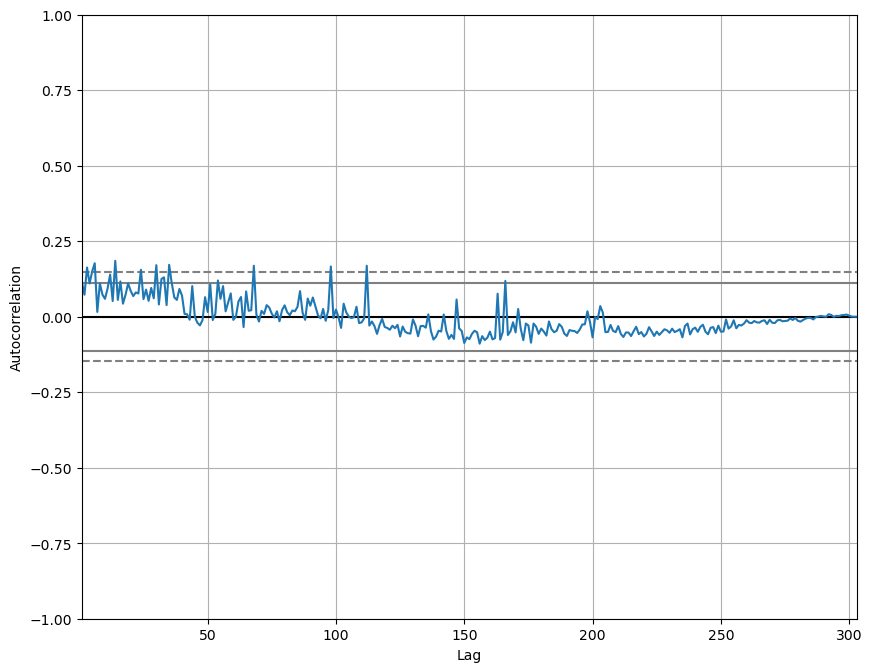

In [329]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
autocorrelation_plot(clock2['Clock_Sales'].tolist())
plt.show()

## If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

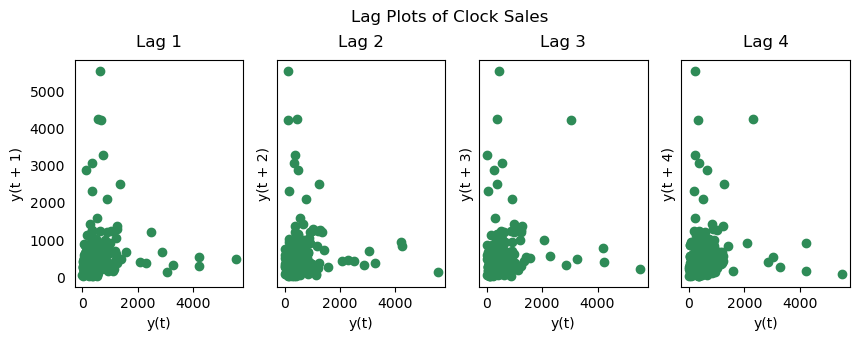

In [331]:
# Lag Plots

from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(clock2['Clock_Sales'], lag=i+1, ax=ax, c='seagreen')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Clock Sales', y=1.05)    
plt.show()

## A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

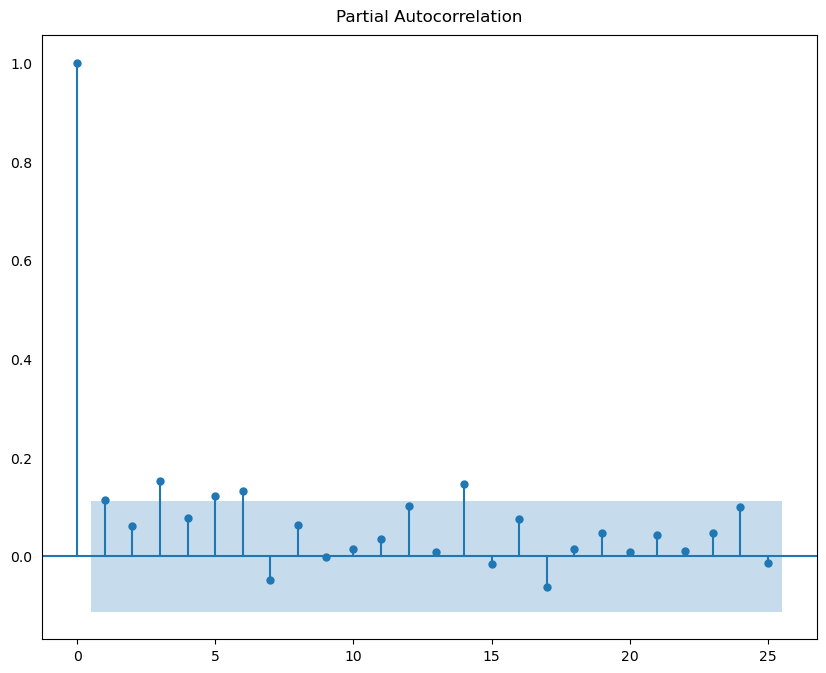

In [335]:
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(clock2['Clock_Sales'], lags=25)

## The above plot can be used to determine the order of AR model. You may note that a correlation value up to order 3 is high enough. Thus, we will train the AR model of order 3.